In [2]:
!pip install rasterio

In [6]:
import numpy as np
A=([1,7,9,5],
   [0.14,1,3,3],
   [0.11,0.33,1,3],
   [0.2,0.33,0.16,1])
 
print(A)
     

([1, 7, 9, 5], [0.14, 1, 3, 3], [0.11, 0.33, 1, 3], [0.2, 0.33, 0.16, 1])


## Pesos

#### Pendiente: 0.67
#### Aspecto: 0.17
#### Elevacion: 0.11
#### Cobertura: 0.05


In [7]:
B=np.array(A)
values, vectores=np.linalg.eig(B) # Función para calcular los valores y vectores propios
vector_norm=vectores/np.linalg.norm(vectores, ord=1) # normalización de los vectores

print(' valores propios',values)
     

 valores propios [ 4.36984543+0.j         -0.03706219+1.47067115j -0.03706219-1.47067115j
 -0.29572106+0.j        ]


In [8]:

print('esto son los vectores propios', vectores)

esto son los vectores propios [[-0.9598876 +0.j          0.96135611+0.j          0.96135611-0.j
   0.914623  +0.j        ]
 [-0.23271658+0.j          0.04670131+0.19859547j  0.04670131-0.19859547j
  -0.3524962 +0.j        ]
 [-0.13064976+0.j         -0.13301937+0.06311492j -0.13301937-0.06311492j
   0.18364031+0.j        ]
 [-0.08596179+0.j         -0.02534418-0.10887279j -0.02534418+0.10887279j
  -0.07407713+0.j        ]]


In [9]:
print('vectores propios normalizados',vector_norm)

vectores propios normalizados [[-0.62950192+0.j          0.63046498+0.j          0.63046498-0.j
   0.59981704+0.j        ]
 [-0.15261738+0.j          0.03062709+0.13024049j  0.03062709-0.13024049j
  -0.23116981+0.j        ]
 [-0.08568115+0.j         -0.08723516+0.04139127j -0.08723516-0.04139127j
   0.12043278+0.j        ]
 [-0.05637443+0.j         -0.01662091-0.07139964j -0.01662091+0.07139964j
  -0.04858037+0.j        ]]


In [10]:

w=vector_norm[:,0]*-1
print(w)

[0.62950192-0.j 0.15261738-0.j 0.08568115-0.j 0.05637443-0.j]


In [11]:

CI=(values[0]-len(values))/(len(values)-1)

CR= CI/1.24

print(CR)#el análisis esta OK

(0.09942081484229508+0j)


# Metodo combinado

In [12]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #libreria para graficar
from pandas import DataFrame
import statsmodels.graphics.api as smg #libreria de estadistica

(19705,)

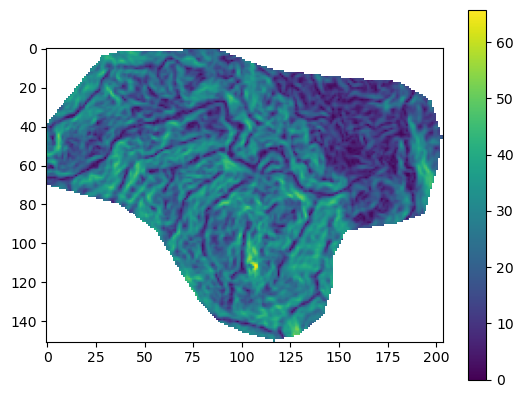

In [13]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/PEND1.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
plt.imshow(pendiente)
plt.colorbar()
pendiente_vector_MenM.shape
     

[0.1 0.3 0.4 0.5 0.8 nan]


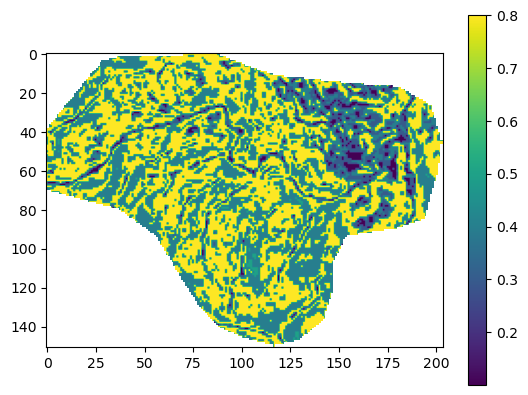

In [18]:
pendiente_re=np.where ( (np.logical_and (pendiente>=0, pendiente<5 )),0.1,pendiente );
pendiente_re=np.where ( (np.logical_and (pendiente_re>=5, pendiente_re<10 )),0.3,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=10, pendiente_re<15 )),0.4,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=15, pendiente_re<30 )),0.8,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=30, pendiente_re<45 )),0.4,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=45, pendiente_re<47 )),0.4,pendiente_re);
pendiente_re=np.where ( pendiente_re>=47,0.5,pendiente_re);
print(np.unique(pendiente_re));
plt.imshow(pendiente_re);
plt.colorbar();
     

(19705,)

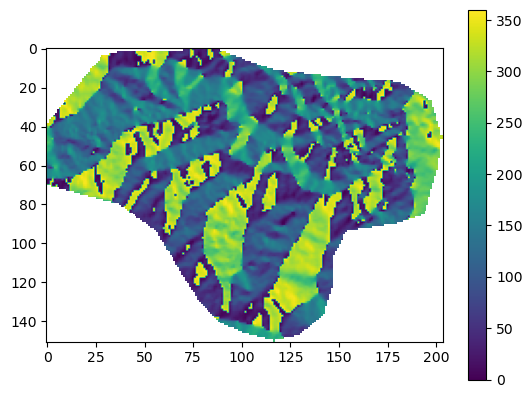

In [16]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-2,np.nan,aspecto)
aspecto=np.where(aspecto<0,0,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape
     

[0.1 0.2 0.3 0.7 nan]


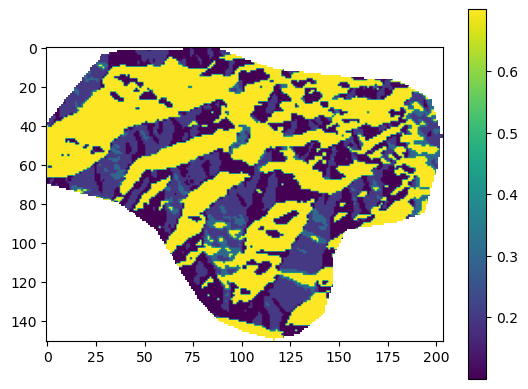

In [28]:
aspecto_re=np.where ( (np.logical_and (aspecto>=0, aspecto<75 )),0.1,aspecto );
aspecto_re=np.where ( (np.logical_and (aspecto_re>=75, aspecto_re<180 )),0.7,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=180, aspecto_re<275 )),0.7,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=275, aspecto_re<300 )),0.3,aspecto_re);
aspecto_re=np.where ( aspecto_re>=300,0.2,aspecto_re);
print(np.unique(aspecto_re));
plt.imshow(aspecto_re);
plt.colorbar();
     

(19705,)

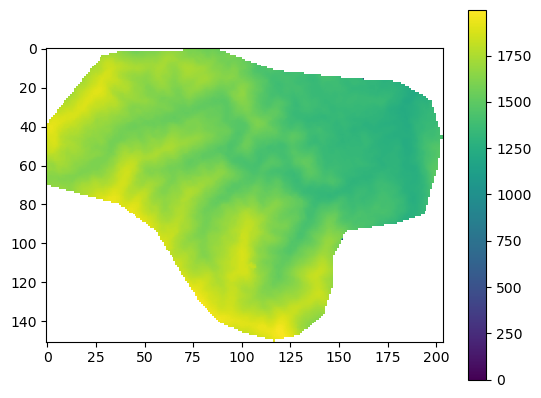

In [20]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/elev_final1.tif?raw=true')
elevacion=raster.read(1)
elevacion=np.where(elevacion<0,np.nan,elevacion)
elevacion_vector=elevacion.ravel()
elevacion_vector_MenM=elevacion_vector[~np.isnan(elevacion_vector)]
plt.imshow(elevacion)
plt.colorbar()
elevacion_vector_MenM.shape

[0.1 0.2 0.3 0.7 nan]


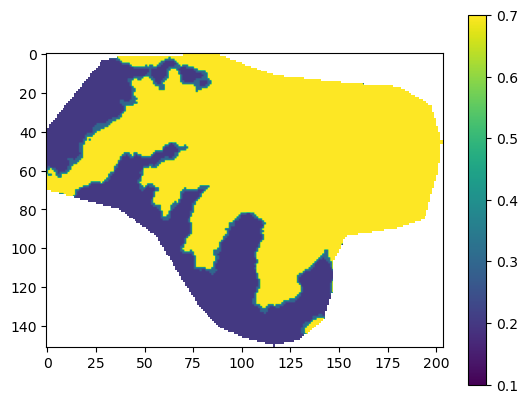

In [21]:
elevacion_re=np.where ( (np.logical_and (elevacion>=0,elevacion<1000 )),0.1,elevacion );
elevacion_re=np.where ( (np.logical_and (elevacion_re>=1000, elevacion_re<1438 )),0.7,elevacion_re);
elevacion_re=np.where ( (np.logical_and (elevacion_re>=1438, elevacion_re<1688 )),0.7,elevacion_re);
elevacion_re=np.where ( (np.logical_and (elevacion_re>=1688, elevacion_re<1708 )),0.3,elevacion_re);
elevacion_re=np.where ( elevacion_re>=1708,0.2,elevacion_re);
print(np.unique(elevacion_re));
plt.imshow(elevacion_re);
plt.colorbar();

(19705,)

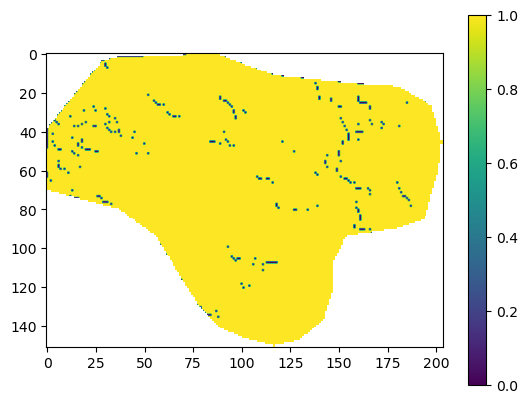

In [22]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/Cobert_final1.tif?raw=true')
cobertura=raster.read(1)
cobertura=np.where(cobertura>=3,np.nan,cobertura)
cobertura_vector=cobertura.ravel()
cobertura_vector_MenM=cobertura_vector[~np.isnan(cobertura_vector)]
plt.imshow(cobertura)
plt.colorbar()
cobertura_vector_MenM.shape

[0.1 0.2 nan]


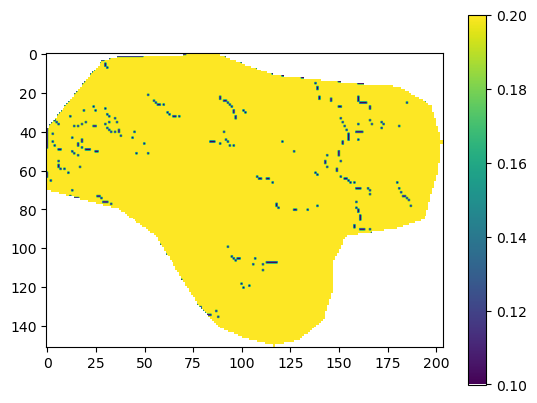

In [23]:
cobertura_re=np.where ( (np.logical_and (cobertura>=0,cobertura<0.4 )),0.1,cobertura );
cobertura_re=np.where ( (np.logical_and (cobertura_re>=0.4, cobertura_re<0.8 )),1,cobertura_re);
cobertura_re=np.where ( cobertura_re>=0.8,0.2,cobertura_re);
print(np.unique(cobertura_re));
plt.imshow(cobertura_re);
plt.colorbar();

In [24]:
print(w[0],w[1],w[2],w[3])

(0.6295019179942924-0j) (0.15261738423411997-0j) (0.0856811488027818-0j) (0.05637442668584418-0j)


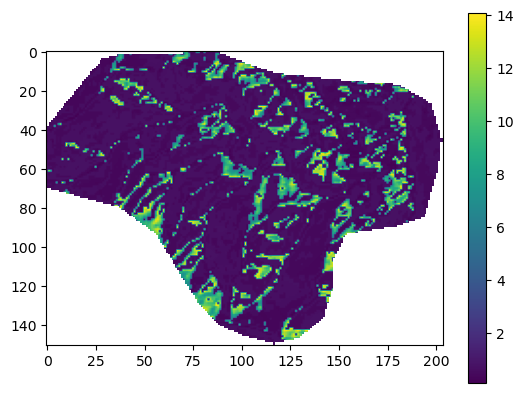

In [27]:
IS=0.67*pendiente_re+0.1793*aspecto_re+0.11*elevacion_re+0.05571*cobertura_re
plt.imshow(IS);
plt.colorbar();